In [1]:
# boilerplate cell for stuff that comes out of the box with R, probably
# copied from https://github.com/Azure/RNNForTimeSeriesForecasting, because I am new to this stuff
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from glob import glob
from collections import UserDict
from IPython.display import Image
from scipy.stats import probplot
%matplotlib inline

# some kind soul ported a bunch of default R datasets (and more) into python, bless his soul
from pydataset import data as pdsd

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)

Original:
```r
help(co2)
```

In [2]:
pdsd("co2",show_doc=True)

co2

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Mauna Loa Atmospheric CO2 Concentration

### Description

Atmospheric concentrations of CO_2_ are expressed in parts per million (ppm)
and reported in the preliminary 1997 SIO manometric mole fraction scale.

### Usage

    co2

### Format

A time series of 468 observations; monthly from 1959 to 1997.

### Details

The values for February, March and April of 1964 were missing and have been
obtained by interpolating linearly between the values for January and May of
1964.

### Source

Keeling, C. D. and Whorf, T. P., Scripps Institution of Oceanography (SIO),
University of California, La Jolla, California USA 92093-0220.

ftp://cdiac.esd.ornl.gov/pub/maunaloa-co2/maunaloa.co2.

### References

Cleveland, W. S. (1993) _Visualizing Data_. New Jersey: Summit Press.

### Examples

    require(graphics)
    plot(co2, ylab = expression("Atmospheric concentration of CO"[2]),
         las = 1)
    t

Original:
```r
plot(co2, main='Atmospheric CO2 Concentration')
```

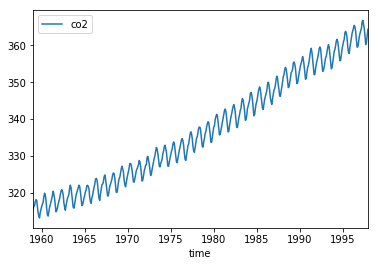

In [3]:
co2 = pdsd("co2")
co2.plot(x="time",y="co2")

Original:
```r
co2.values = as.numeric(co2)
co2.times = as.numeric( time(co2) )
SSxx = sum( (co2.times - mean(co2.times) ) * (co2.times - mean(co2.times) ) )
SSxy = sum( (co2.values - mean(co2.values) ) * (co2.times - mean(co2.times) ) )
( slope = SSxy / SSxx )
( intercept = mean(co2.values) - slope*mean(co2.times) )
```

In [4]:
ssxx = np.sum((co2['time'] - co2['time'].mean()) ** 2)
ssxy = np.sum((co2['co2'] - co2['co2'].mean()) * (co2['time'] - co2['time'].mean()))
slope = ssxy / ssxx
slope

1.3074966906113792

In [5]:
intercept = co2['co2'].mean() - slope * co2['time'].mean()
intercept

-2249.7741977069913

Original:
```r
co2.linear.model = lm(co2 ~ time(co2) )
```

In [6]:
A = np.vstack([co2['time'], np.ones(len(co2['time']))]).T
lm = np.linalg.lstsq(a=A,b=co2['co2'],rcond=None)
m,c = lm[0]
co2['lm'] = m*co2['time'] + c
lm[1]

array([3194.08])

Original:
```R
plot(co2, main='Atmospheric CO2 Concentration with Fitted Line')
abline(co2.linear.model )
```

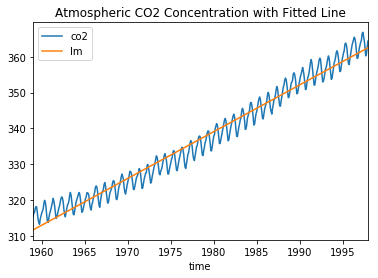

In [7]:
co2.plot(x="time",y=["co2","lm"],title='Atmospheric CO2 Concentration with Fitted Line')

Original:
```R
co2.residuals = co2.values - co2.fitted.values
hist(co2.residuals, main= "Histogram of CO2 Residuals")
```

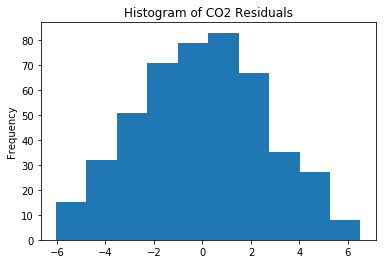

In [8]:
co2['resid'] = co2['co2'] - co2['lm']
co2['resid'].plot.hist(title="Histogram of CO2 Residuals")

Original:
```R
qqnorm(c02.residuals, main= "Normal Probability Plot")
qqline(c02.residuals)
```

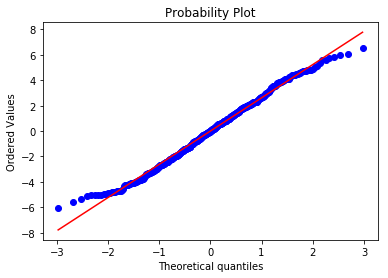

In [12]:
probplot(co2['resid'],plot=plt)
plt.show()

Original:
```R
plot(c02.residuals ~ time(co2), main="Residuals on Time")
```

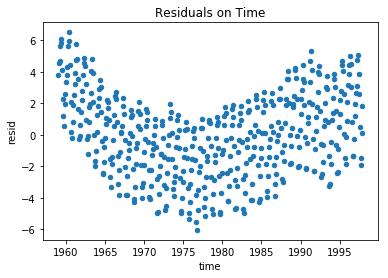

In [14]:
co2.plot.scatter(x="time",y="resid",title="Residuals on Time")

Original:
```R
plot(c02.residuals ~ time(co2), xlim=c(1960, 1963), main="Zoomed in Residuals on Time")
```

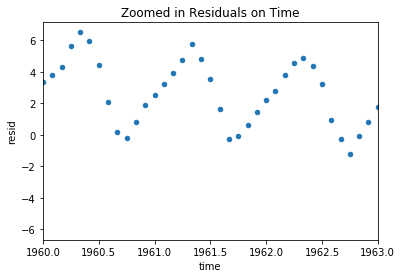

In [15]:
co2.plot.scatter(x="time",y="resid",xlim=(1960,1963),title="Zoomed in Residuals on Time")